In [1]:
# Unit 8 Project 1
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime as dt
import plotly.express as px
import os
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
import hvplot.pandas
from pandas_datareader import data as wb

In [2]:
print(f"Current Working Directory: {Path.cwd()}")

Current Working Directory: C:\Users\Anirban\Desktop\Python Code folder\Project1\Project_1


In [2]:
############################# Data Importing #################
# Import different stock market indexes full dataset from 1 Jan 2015 to 24 July 2020
INX_df = pd.read_csv(Path("Data/INX.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
TSX_df = pd.read_csv(Path("Data/TSX.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
NI225_df = pd.read_csv(Path("Data/NI225.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
SHA_df = pd.read_csv(Path("Data/SHA.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
SX5E_df = pd.read_csv(Path("Data/SX5E.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)  
UKX_df = pd.read_csv(Path("Data/UKX.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
Gold_df = pd.read_csv(Path("Data/Gold.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
Gold_df.head()

GC=F
Date                   
2015-01-02  1186.000000
2015-01-05  1203.900024
2015-01-06  1219.300049
2015-01-07  1210.599976
2015-01-08  1208.400024

In [3]:
############################# Data Sorting#################
INX_df = INX_df.sort_values("Date")
TSX_df = TSX_df.sort_values("Date")
NI225_df = NI225_df.sort_values("Date")
SHA_df = SHA_df.sort_values("Date")
SX5E_df = SX5E_df.sort_values("Date")
UKX_df = UKX_df.sort_values("Date")
Gold_df = Gold_df.sort_values("Date")

In [4]:
############################# Renaming Column Names #################
INX_df.columns.values[0] = "INX"
TSX_df.columns.values[0] = "TSX"
NI225_df.columns.values[0] = "NI225"
SHA_df.columns.values[0] = "SHA"
SX5E_df.columns.values[0] = "SX5E"
UKX_df.columns.values[0] = "UKX"
Gold_df.columns.values[0] = "GOLD"
# combined_portfolios_df.head()
Gold_df.head()

GOLD
Date                   
2015-01-02  1186.000000
2015-01-05  1203.900024
2015-01-06  1219.300049
2015-01-07  1210.599976
2015-01-08  1208.400024

In [5]:
############################# Creating Pre and Post Covid Data for 1 year and 5 years#################
################################################################################################
# Concatinate indices into single dataframe
combined_portfolios_df = pd.concat(
     [INX_df, TSX_df, NI225_df, SHA_df, SX5E_df, UKX_df, Gold_df], axis="columns", join="inner"
 )
combined_portfolios_df.dropna(inplace=True)
combined_portfolios_df.isnull().sum()
# Slice data based on inial date for 1 year or 5 years back and ending date based on pre-covid (up to 15 Feb 2020) and post-covid (up to 24 July 2020)
pre_covid_1_df = combined_portfolios_df.loc['2019-03-01':'2020-02-15'].copy()
post_covid_1_df = combined_portfolios_df.loc['2019-07-01'::].copy()
pre_covid_5_df = combined_portfolios_df.loc['2015-03-01':'2020-02-15'].copy()
post_covid_5_df = combined_portfolios_df.loc['2015-07-01'::].copy()

pre_covid_1_df.tail()
post_covid_1_df.tail()

INX           TSX         NI225          SHA         SX5E  \
Date                                                                            
2020-07-16  3215.570068  16024.500000  22770.359375  3210.099121  3365.350098   
2020-07-17  3224.729980  16123.500000  22696.419922  3214.128906  3365.600098   
2020-07-20  3251.840088  16183.700195  22717.480469  3314.148926  3388.340088   
2020-07-21  3257.300049  16163.000000  22884.220703  3320.895020  3405.350098   
2020-07-22  3276.020020  16171.099609  22751.609375  3333.164062  3370.760010   

                UKX         GOLD  
Date                              
2020-07-16  6250.69  1807.099976  
2020-07-17  6290.30  1812.099976  
2020-07-20  6261.52  1819.300049  
2020-07-21  6269.73  1846.000000  
2020-07-22  6207.10  1868.900024

In [6]:
# Save the pre and post covid data as a csv file
pre_covid_1_df.to_csv("Data/pre_covid_1_df.csv")
post_covid_1_df.to_csv("Data/post_covid_1_df.csv")
pre_covid_5_df.to_csv("Data/pre_covid_5_df.csv")
post_covid_5_df.to_csv("Data/post_covid_5_df.csv")

In [8]:
# Calculate Daily Returns for Pre Covid Data
daily_returns_pre_covid = pre_covid_1_df.pct_change().dropna().copy()
daily_returns_pre_covid.head()

INX       TSX     NI225       SHA      SX5E       UKX  \
Date                                                                     
2019-03-04 -0.003881 -0.001879  0.010154  0.011213  0.001516  0.003892   
2019-03-05 -0.001132  0.003018 -0.004388  0.008809  0.003036  0.006874   
2019-03-06 -0.006524  0.000348 -0.005959  0.015667 -0.000757  0.001750   
2019-03-07 -0.008126 -0.002212 -0.006520  0.001392 -0.004758 -0.005343   
2019-03-11  0.012503  0.003095 -0.015423 -0.025568 -0.001333 -0.003762   

                GOLD  
Date                  
2019-03-04 -0.008948  
2019-03-05 -0.002179  
2019-03-06  0.002262  
2019-03-07 -0.000856  
2019-03-11  0.003895

In [9]:
# Calculate Daily Returns for Post Covid Data
daily_returns_post_covid = post_covid_1_df.pct_change().dropna().copy()
daily_returns_post_covid.head()

INX       TSX     NI225       SHA      SX5E       UKX  \
Date                                                                     
2019-07-05  0.005853  0.004292 -0.000363 -0.010803  0.005701 -0.000800   
2019-07-08 -0.004835 -0.004776 -0.009750 -0.025804 -0.001196 -0.000512   
2019-07-09  0.001237  0.004993  0.001430 -0.001750 -0.003976 -0.001696   
2019-07-10  0.004511  0.001094 -0.001469 -0.004415 -0.002345 -0.000767   
2019-07-11  0.002285 -0.002137  0.005111  0.000843 -0.001368 -0.002771   

                GOLD  
Date                  
2019-07-05 -0.005624  
2019-07-08  0.000215  
2019-07-09  0.000358  
2019-07-10  0.009016  
2019-07-11 -0.004113

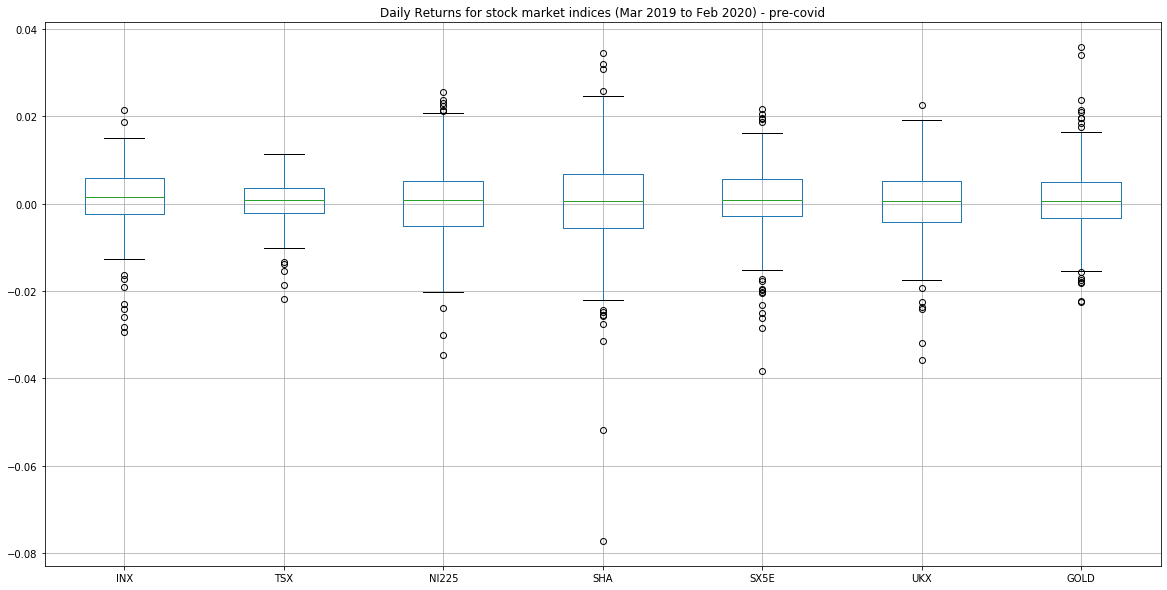

In [10]:
############################# Anlysis PRE-COVID for last 1 year (2019-03-01 to 2020-02-15) ################################
################################################################################################
# Box plot to visually show risk
daily_returns_pre_covid.boxplot(figsize=(20,10))
plt.title('Daily Returns for stock market indices (Mar 2019 to Feb 2020) - pre-covid')
plt.savefig("Images/boxplot_pre-covid_1yr.png")

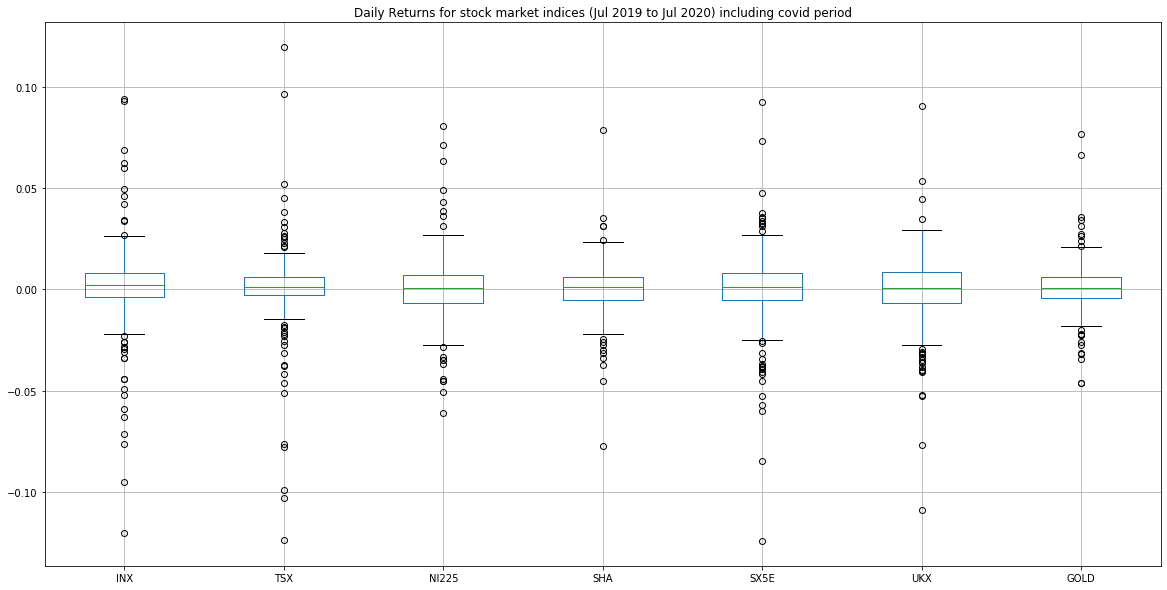

In [11]:
# Box plot to visually show risk - POST COVID
daily_returns_post_covid.boxplot(figsize=(20,10))
plt.title('Daily Returns for stock market indices (Jul 2019 to Jul 2020) including covid period')
plt.savefig("Images/boxplot_post-covid_1yr.png")

In [12]:
# Calculate the standard deviation for each portfolio
pre_covid_1_df_std = daily_returns_pre_covid.std()
pre_covid_1_df_std.head(10)

INX      0.007683
TSX      0.004965
NI225    0.009403
SHA      0.012722
SX5E     0.008867
UKX      0.008168
GOLD     0.008191
dtype: float64

In [13]:
# Calculate the standard deviation for each portfolio
post_covid_1_df_std = daily_returns_post_covid.std()
post_covid_1_df_std.head(10)

INX      0.022737
TSX      0.022025
NI225    0.017194
SHA      0.013612
SX5E     0.020451
UKX      0.018693
GOLD     0.013155
dtype: float64

In [14]:
# Calculate the annualized standard deviation (252 trading days)
pre_covid_1_df_annualized_std = pre_covid_1_df_std * np.sqrt(252)
pre_covid_1_df_annualized_std.head(7)

INX      0.121964
TSX      0.078820
NI225    0.149263
SHA      0.201951
SX5E     0.140765
UKX      0.129664
GOLD     0.130026
dtype: float64

In [15]:
# Calculate the annualized standard deviation (252 trading days)
post_covid_1_df_annualized_std = post_covid_1_df_std * np.sqrt(252)
post_covid_1_df_annualized_std.head(7)

INX      0.360936
TSX      0.349639
NI225    0.272947
SHA      0.216076
SX5E     0.324651
UKX      0.296746
GOLD     0.208823
dtype: float64

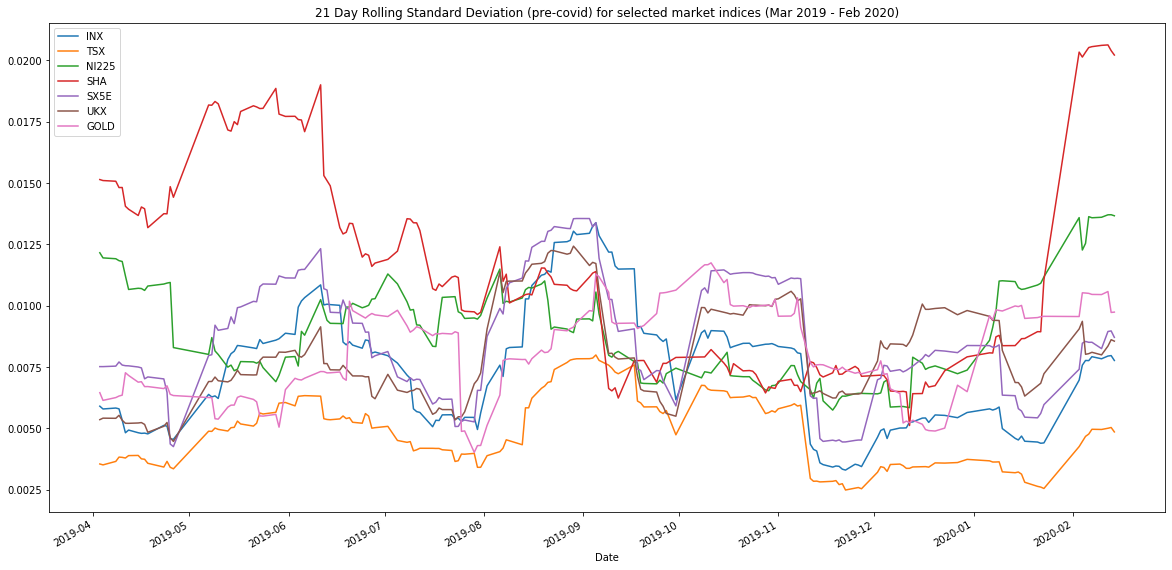

In [16]:
#Rolling Statistics - Risk changes over time. Analyze the rolling statistics for Risk.
#Calculate and plot the rolling standard deviation for 1 year pre-covid data using a 21 trading day window
#sorting before the moving averages
daily_returns_pre_covid = daily_returns_pre_covid.sort_index()
#Calculating rolling std using 21 trading day window
rolling_std = daily_returns_pre_covid.rolling(window=21).std().plot(title = '21 Day Rolling Standard Deviation (pre-covid) for selected market indices (Mar 2019 - Feb 2020)', figsize =[20,10])
#plotting
rolling_std
plt.savefig("Images/21_day_rolling_std_precovid.png")

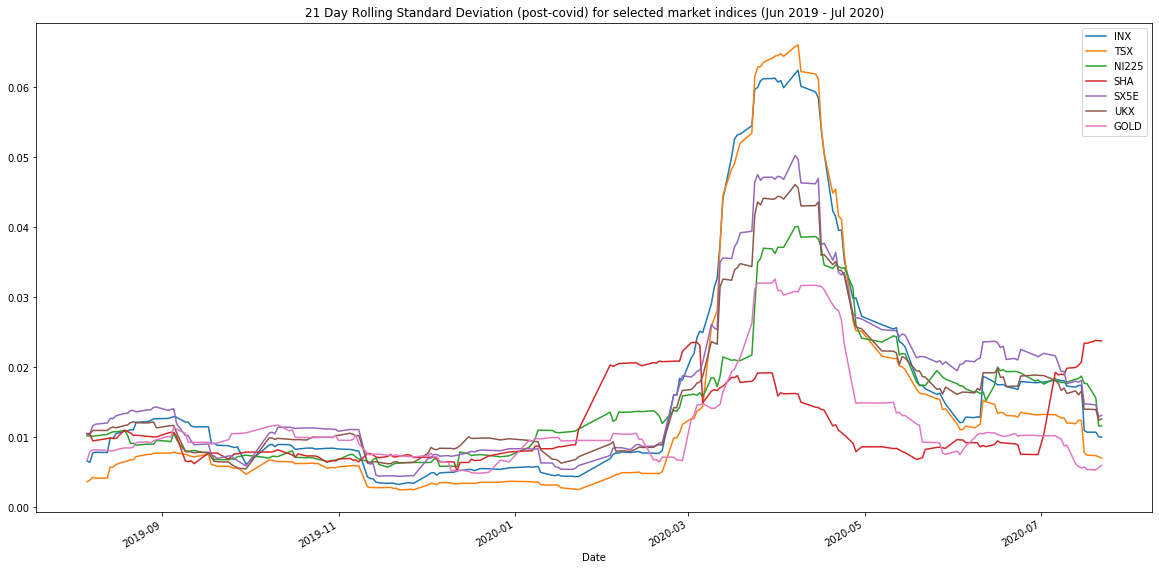

In [16]:
#Rolling Statistics - Risk changes over time. Analyze the rolling statistics for Risk and Beta.
#Calculate and plot the rolling standard deviation for 1 year post-covid data using a 21 trading day window
#sorting before the moving averages
daily_returns_post_covid = daily_returns_post_covid.sort_index()
#Calculating rolling std using 21 trading day window
rolling_std = daily_returns_post_covid.rolling(window=21).std().plot(
    title = '21 Day Rolling Standard Deviation (post-covid) for selected market indices (Jun 2019 - Jul 2020)', 
    figsize =[20,10]
)
#plotting
rolling_std
plt.savefig("Images/21_day_rolling_std_postcovid.png")                                                          

In [19]:
#Construct a correlation table with pre-covid daily returns
correlation_table_pre = daily_returns_pre_covid.corr()
correlation_table_pre

INX       TSX     NI225       SHA      SX5E       UKX      GOLD
INX    1.000000  0.814063  0.288615  0.352678  0.778907  0.650895 -0.342524
TSX    0.814063  1.000000  0.318494  0.305661  0.723774  0.623796 -0.275372
NI225  0.288615  0.318494  1.000000  0.508024  0.329617  0.363985 -0.276731
SHA    0.352678  0.305661  0.508024  1.000000  0.428297  0.446128 -0.053577
SX5E   0.778907  0.723774  0.329617  0.428297  1.000000  0.801630 -0.374593
UKX    0.650895  0.623796  0.363985  0.446128  0.801630  1.000000 -0.322391
GOLD  -0.342524 -0.275372 -0.276731 -0.053577 -0.374593 -0.322391  1.000000

In [18]:
#Construct a correlation table post-covid daily returns
correlation_table_post = daily_returns_post_covid.corr()
correlation_table_post

INX       TSX     NI225       SHA      SX5E       UKX      GOLD
INX    1.000000  0.904237  0.358873  0.344537  0.743560  0.757660 -0.003187
TSX    0.904237  1.000000  0.399896  0.330415  0.791577  0.829482  0.000162
NI225  0.358873  0.399896  1.000000  0.493959  0.576220  0.522694  0.047011
SHA    0.344537  0.330415  0.493959  1.000000  0.389529  0.388810  0.056245
SX5E   0.743560  0.791577  0.576220  0.389529  1.000000  0.929097  0.054192
UKX    0.757660  0.829482  0.522694  0.388810  0.929097  1.000000  0.006659
GOLD  -0.003187  0.000162  0.047011  0.056245  0.054192  0.006659  1.000000

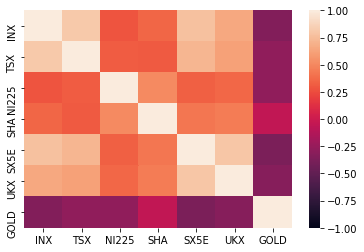

In [20]:
#correlation matrix using a heatmap
sns.heatmap(correlation_table_pre, vmin=-1, vmax=1)

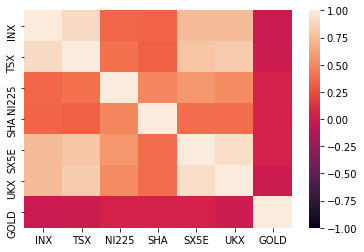

In [21]:
#correlation matrix using a heatmap
sns.heatmap(correlation_table_post, vmin=-1, vmax=1)

In [22]:
# Remove the gold based on the co-rrelations
pre_covid_1_df = pre_covid_1_df.drop(columns=["GOLD"])
post_covid_1_df = post_covid_1_df.drop(columns=["GOLD"])
pre_covid_5_df = pre_covid_5_df.drop(columns=["GOLD"])
post_covid_5_df = post_covid_5_df.drop(columns=["GOLD"])
post_covid_1_df.head()

INX           TSX         NI225          SHA        SX5E  \
Date                                                                           
2019-07-02  2973.010010  16471.300781  21754.269531  3043.943115  3507.97998   
2019-07-05  2990.409912  16542.000000  21746.380859  3011.059082  3527.97998   
2019-07-08  2975.949951  16463.000000  21534.349609  2933.363037  3523.76001   
2019-07-09  2979.629883  16545.199219  21565.150391  2928.229980  3509.75000   
2019-07-10  2993.070068  16563.300781  21533.480469  2915.302002  3501.52002   

                UKX  
Date                 
2019-07-02  7559.19  
2019-07-05  7553.14  
2019-07-08  7549.27  
2019-07-09  7536.47  
2019-07-10  7530.69

In [24]:
# Drop nulls from Pre Covid Dataframe
pre_covid_1_df.dropna(inplace=True)
pre_covid_1_df.isnull().sum()
# # Drop nulls from Post Covid Dataframe
post_covid_1_df.dropna(inplace=True)
post_covid_1_df.isnull().sum()

INX      0
TSX      0
NI225    0
SHA      0
SX5E     0
UKX      0
dtype: int64

In [25]:
# Calculate Daily Returns for Pre Covid Data after removing gold
daily_returns_pre_covid = pre_covid_1_df.pct_change().dropna().copy()
daily_returns_pre_covid.head()

INX       TSX     NI225       SHA      SX5E       UKX
Date                                                                  
2019-03-04 -0.003881 -0.001879  0.010154  0.011213  0.001516  0.003892
2019-03-05 -0.001132  0.003018 -0.004388  0.008809  0.003036  0.006874
2019-03-06 -0.006524  0.000348 -0.005959  0.015667 -0.000757  0.001750
2019-03-07 -0.008126 -0.002212 -0.006520  0.001392 -0.004758 -0.005343
2019-03-11  0.012503  0.003095 -0.015423 -0.025568 -0.001333 -0.003762

In [28]:
# Calculate Daily Returns for Post Covid Data after removing gold
daily_returns_post_covid = post_covid_1_df.pct_change().dropna().copy()
daily_returns_post_covid.head()

INX       TSX     NI225       SHA      SX5E       UKX
Date                                                                  
2019-07-05  0.005853  0.004292 -0.000363 -0.010803  0.005701 -0.000800
2019-07-08 -0.004835 -0.004776 -0.009750 -0.025804 -0.001196 -0.000512
2019-07-09  0.001237  0.004993  0.001430 -0.001750 -0.003976 -0.001696
2019-07-10  0.004511  0.001094 -0.001469 -0.004415 -0.002345 -0.000767
2019-07-11  0.002285 -0.002137  0.005111  0.000843 -0.001368 -0.002771

In [29]:
#5. Calculate the Sharpe ratios by computing the quotient of `annualized average return` and `annualized standard deviation`.
sharpe_ratios_pre1 = (daily_returns_pre_covid.mean() * 252) / (daily_returns_pre_covid.std()* np.sqrt(252))
sharpe_ratios_pre1

INX      2.043171
TSX      1.762426
NI225    0.872177
SHA     -0.065016
SX5E     1.430920
UKX      0.480162
dtype: float64

In [30]:
#5. Calculate the Sharpe ratios by computing the quotient of `annualized average return` and `annualized standard deviation`.
sharpe_ratios_post1 = (daily_returns_post_covid.mean() * 252) / (daily_returns_post_covid.std()* np.sqrt(252))
sharpe_ratios_post1

INX      0.492870
TSX      0.116390
NI225    0.324927
SHA      0.593550
SX5E     0.022307
UKX     -0.617615
dtype: float64

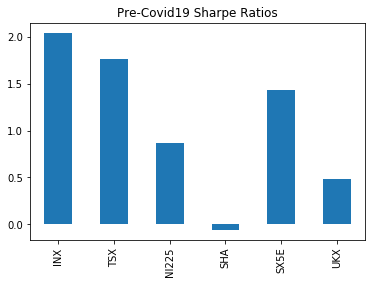

In [31]:
# Plot the Sharpe ratios using a bar chart.
sharpe_ratios_pre1.plot(kind="bar", title="Pre-Covid19 Sharpe Ratios")

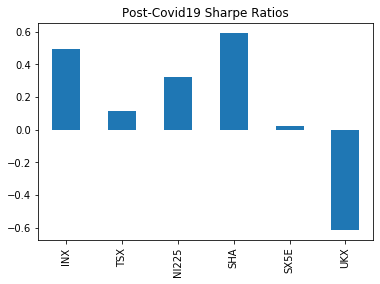

In [32]:
# Plot the Sharpe ratios using a bar chart.
sharpe_ratios_post1.plot(kind="bar", title="Post-Covid19 Sharpe Ratios")

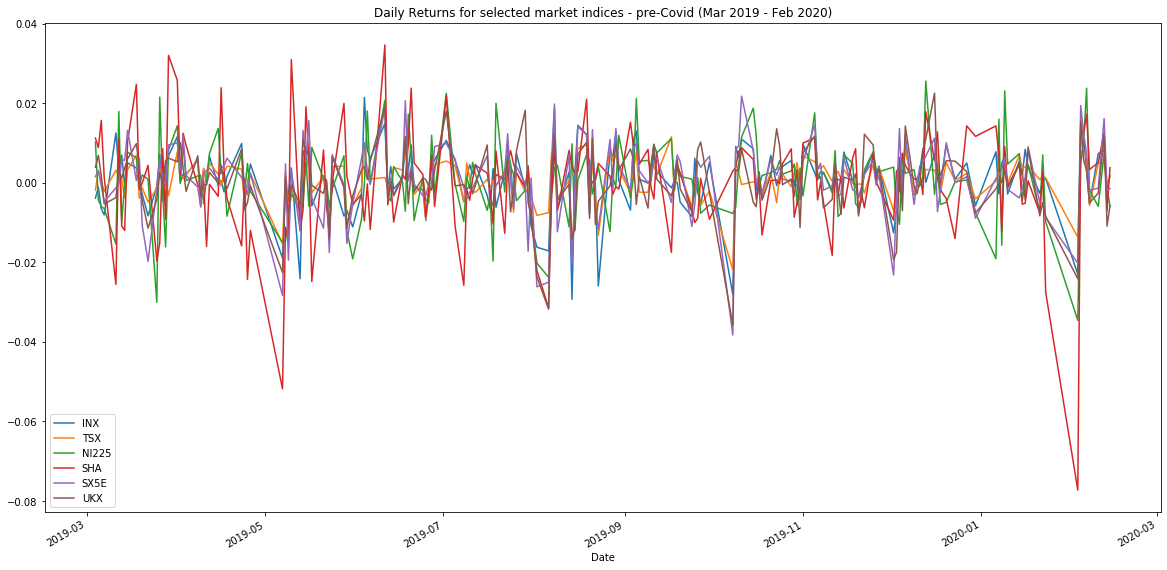

In [33]:
# Plotting the daily returns for Pre Covid daily returns
daily_returns_pre_covid.plot(
    title='Daily Returns for selected market indices - pre-Covid (Mar 2019 - Feb 2020)', 
    figsize=(20,10)
)
plt.savefig("Images/daily_returns_key_indices_pre-covid.png")

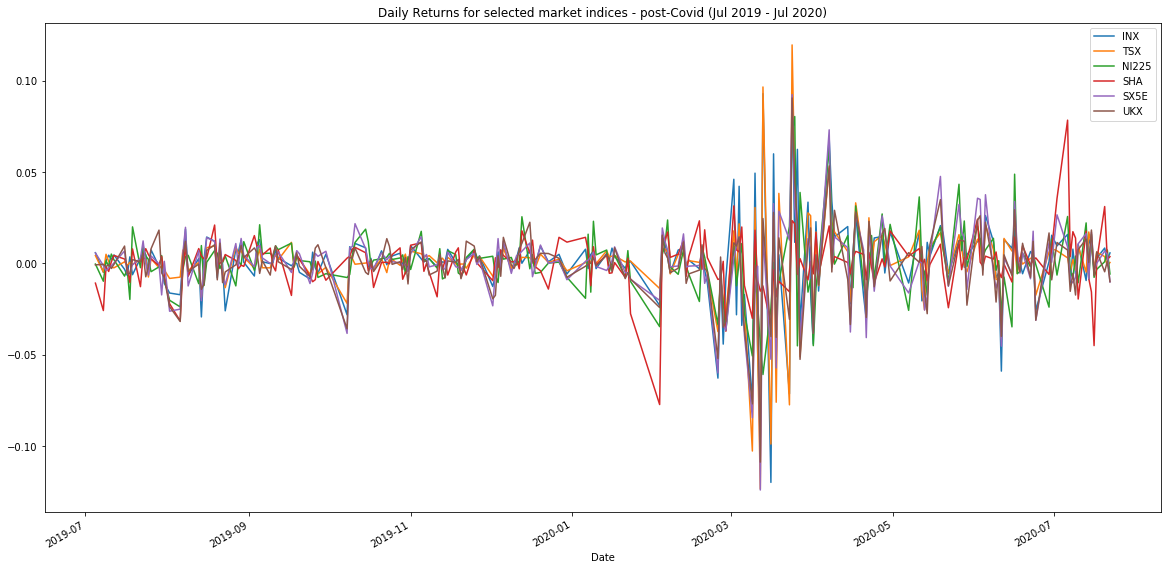

In [34]:
# Plotting the daily returns for Pre Covid daily returns
daily_returns_post_covid.plot(
    title='Daily Returns for selected market indices - post-Covid (Jul 2019 - Jul 2020)', 
    figsize=(20,10)
)
plt.savefig("Images/daily_returns_key_indices_post-covid.png")

In [35]:
daily_returns_post_covid.hvplot.line(
    title = "Daily returns for selected market indices - post-Covid (Jun 2019 - Jul 2020)", 
    xlabel = "Date", 
    ylabel = "Returns",
    frame_height = 400, 
    frame_width=600, 
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [36]:
# Calculate cumulative returns for Pre Covid
cumulative_returns_pre_covid = (1 + daily_returns_pre_covid).cumprod()
cumulative_returns_pre_covid.head()
# Calculate cumulative returns for Post Covid
cumulative_returns_post_covid = (1 + daily_returns_post_covid).cumprod()
cumulative_returns_post_covid.head()

INX       TSX     NI225       SHA      SX5E       UKX
Date                                                                  
2019-07-05  1.005853  1.004292  0.999637  0.989197  1.005701  0.999200
2019-07-08  1.000989  0.999496  0.989891  0.963672  1.004498  0.998688
2019-07-09  1.002227  1.004486  0.991307  0.961986  1.000505  0.996994
2019-07-10  1.006747  1.005585  0.989851  0.957739  0.998158  0.996230
2019-07-11  1.009048  1.003436  0.994909  0.958546  0.996793  0.993469

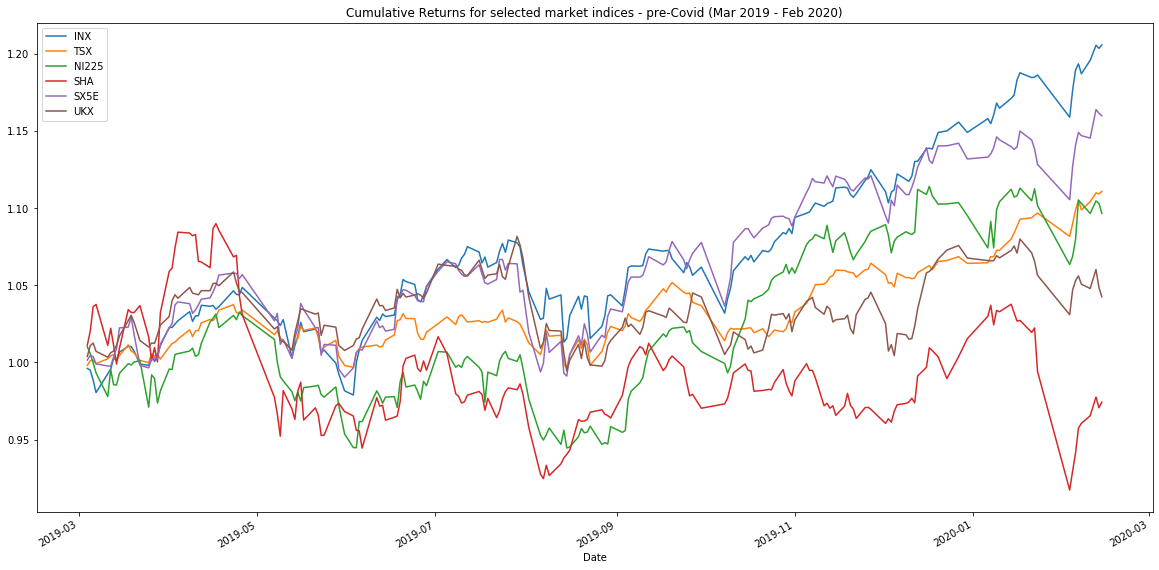

In [37]:
# Plotting cumulative returns for Pre Covid
cumulative_returns_pre_covid.plot(
    title='Cumulative Returns for selected market indices - pre-Covid (Mar 2019 - Feb 2020)', 
    figsize=(20,10)
)
plt.savefig("Images/cumulative_returns_key_indices_pre-covid.png")

In [36]:
cumulative_returns_post_covid.hvplot.line(
    title = "Cumulative returns for selected market indices - post-Covid (Jul 2019 - Jul 2020)", 
    xlabel = "Date", 
    ylabel = "Returns",
    frame_height = 400, 
    frame_width=600, 
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [38]:
# Calculate Daily Returns for Post Covid Data for 5 years
daily_returns_post_covid5 = post_covid_5_df.pct_change().dropna().copy()
daily_returns_post_covid5.head()

INX       TSX     NI225       SHA      SX5E       UKX
Date                                                                  
2015-07-06 -0.003862 -0.003033 -0.019997 -0.034977 -0.028312 -0.014296
2015-07-07  0.006081  0.002117  0.013150 -0.012921 -0.021101 -0.015832
2015-07-08 -0.016653 -0.014524 -0.031357 -0.059009  0.010112  0.009093
2015-07-09  0.002262 -0.009270  0.005971  0.057635  0.027808  0.014009
2015-07-10  0.012338  0.009287 -0.003811  0.045419  0.031807  0.013940

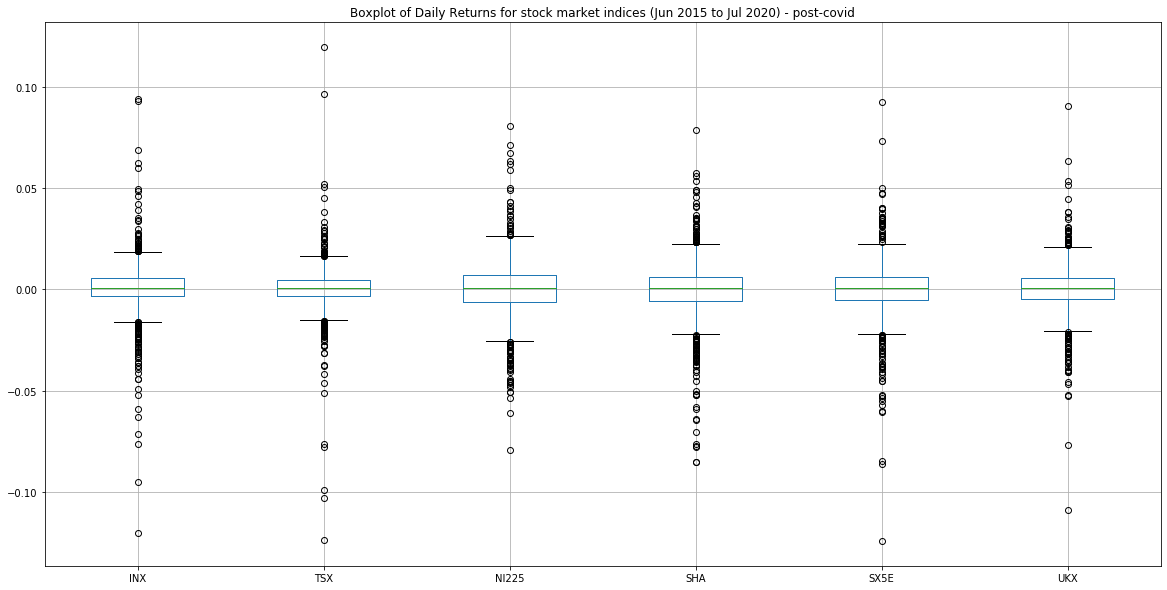

In [39]:
# Box plot to visually show risk
daily_returns_post_covid5.boxplot(figsize=(20,10))
plt.title('Boxplot of Daily Returns for stock market indices (Jun 2015 to Jul 2020) - post-covid')
plt.savefig("Images/boxplot_post-covid_5yr.png")

In [40]:
# Calculate cumulative returns for Post Covid 5 years
cumulative_returns_post_covid5 = (1 + daily_returns_post_covid5).cumprod()
cumulative_returns_post_covid5.head()

INX       TSX     NI225       SHA      SX5E       UKX
Date                                                                  
2015-07-06  0.996138  0.996967  0.980003  0.965023  0.971688  0.985704
2015-07-07  1.002196  0.999078  0.992890  0.952555  0.951185  0.970099
2015-07-08  0.985506  0.984568  0.961756  0.896346  0.960803  0.978920
2015-07-09  0.987736  0.975441  0.967499  0.948007  0.987520  0.992634
2015-07-10  0.999923  0.984499  0.963812  0.991064  1.018930  1.006472

In [41]:
cumulative_returns_post_covid5.hvplot.line(
    title = "Cumulative returns for selected market indices - post-Covid (Jul 2015 - Jul 2020)", 
    xlabel = "Date", 
    ylabel = "Returns",
    frame_height = 400, 
    frame_width=600, 
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

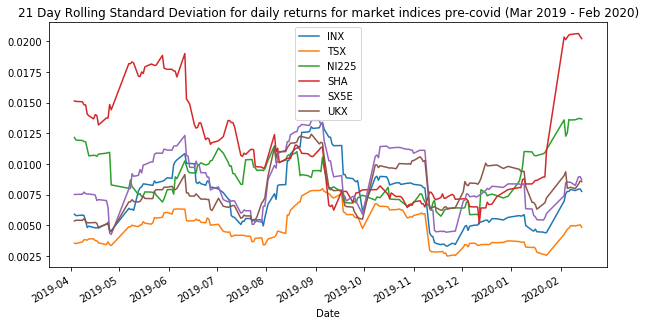

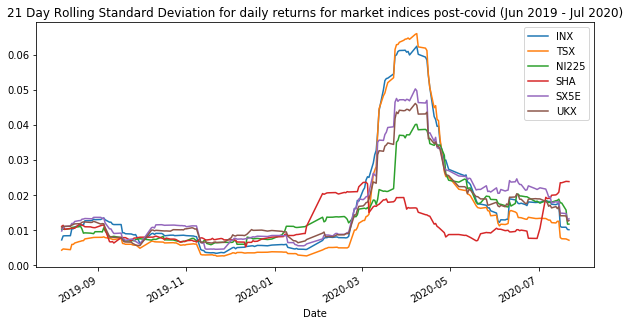

In [42]:
#Rolling Statistics - Risk changes over time. Analyze the rolling statistics for Risk and Beta.

#Calculate and plot the rolling standard deviation for the S&P 500 and whale portfolios using a 21 trading day window
#sorting before the moving averages for Pre & Post Covid
daily_returns_pre_covid = daily_returns_pre_covid.sort_index()
daily_returns_post_covid = daily_returns_post_covid.sort_index()

#Calculating rolling std using 21 trading day window
rolling_std_pre_covid = daily_returns_pre_covid.rolling(window=21).std().plot(
    title = '21 Day Rolling Standard Deviation for daily returns for market indices pre-covid (Mar 2019 - Feb 2020)', 
    figsize =[10,5]
)
plt.savefig("Images/21d_rolling_std_key_indices_pre-covid.png")
rolling_std_post_covid = daily_returns_post_covid.rolling(window=21).std().plot(
    title = '21 Day Rolling Standard Deviation for daily returns for market indices post-covid (Jun 2019 - Jul 2020)', 
    figsize =[10,5]
)
#plotting
plt.savefig("Images/1d_rolling_std_key_indices_post-covid.png")

In [43]:
############################# Monte Carlo for SP500 for last 1 year Pre-Covid ##############
##########################################################################################################

# Set the random seed for results reproducibility (for testing purposes only)
np.random.seed(42)

# Setup the Monte Carlo Parameters
number_simulations = 1000
number_records = 252 * 20
# Initialize empty DataFrame to hold simulated prices for each simulation
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Save the last day's closing price - change it 
sp500_last_price= pre_covid_1_df['INX'][-1]
print(f"Last Day's Closing Price of S&P 500 stock is: {sp500_last_price }")

# Avg daily return Pre & Post Covid
avg_daily_return_sp500 = daily_returns_pre_covid.mean()['INX']
# STD  for pre covid
std_dev_daily_return_precovid_sp500 = daily_returns_pre_covid.std()['INX']

# Run the simulation of projecting stock prices for the next trading year, 600` times
for n in range(number_simulations):

    # Initialize the simulated prices list with the last closing price of `S&P 500`
    simulated_sp500_prices = [sp500_last_price]
    # Simulate the returns for 252 * 30 days
    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        simulated_sp500_price = simulated_sp500_prices[-1] * (1 + np.random.normal(avg_daily_return_sp500, std_dev_daily_return_precovid_sp500))
        # Append the simulated price to the list
        simulated_sp500_prices.append(simulated_sp500_price)
    # Append the simulated prices of each simulation to DataFrame
    monte_carlo= pd.Series(simulated_sp500_prices)
    # Calculate the daily returns of simulated prices
    simulated_daily_returns_pre_covid = monte_carlo.pct_change()
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + simulated_daily_returns_pre_covid.fillna(0)).cumprod()

portfolio_cumulative_returns.head()

Last Day's Closing Price of S&P 500 stock is: 3380.159912109375


0         1         2         3         4         5         6    \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  1.004805  1.004823  1.015192  0.993075  1.003648  0.998603  0.989521   
2  1.004731  0.992753  1.005997  0.995175  0.998653  0.991630  0.989440   
3  1.010725  0.992435  1.009107  1.000690  1.005367  0.991712  0.987137   
4  1.023551  0.987218  1.022252  1.006524  1.008411  0.988569  0.995290   

        7         8         9    ...       990       991       992       993  \
0  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1  1.013981  0.996630  0.998105  ...  0.996647  0.997695  1.000421  1.012832   
2  1.025383  0.994840  1.007262  ...  0.989719  0.991568  1.006121  1.027586   
3  1.010635  0.996585  1.008524  ...  0.983837  0.996579  1.001931  1.032918   
4  1.005657  0.999240  0.994039  ...  0.957432  0.999501  0.998569  1.041819   

        994       995       996       997       998       999  
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1  1.007652  1.001953  0.995641  0.996004  0.998731  1.002604  
2  1.021951  1.012195  0.982948  1.014903  1.000403  1.009298  
3  1.024369  1.033349  0.988776  1.016831  0.995789  1.016293  
4  1.009867  1.025360  0.990786  1.013239  0.990689  1.024137  

[5 rows x 1000 columns]

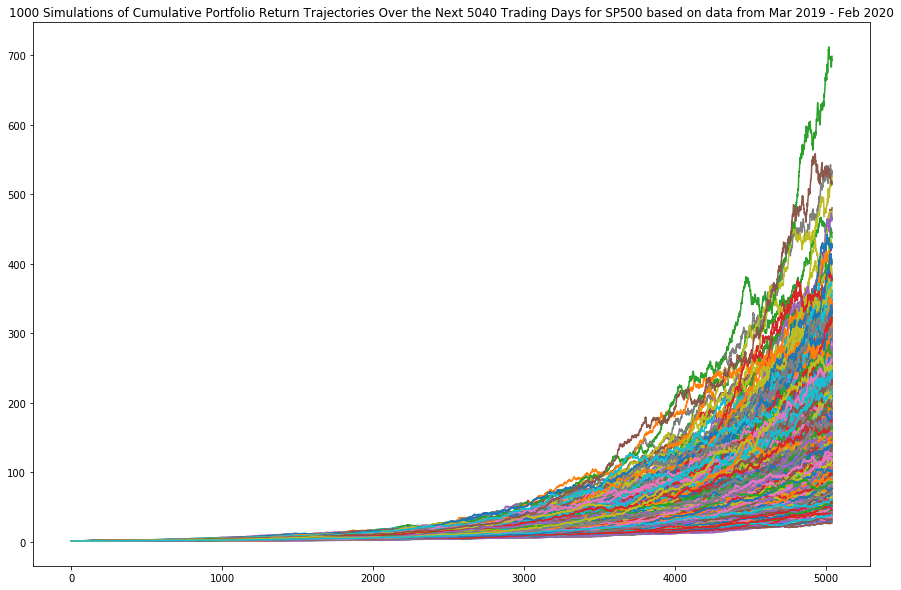

In [44]:
#Pre-Covid simulated cumulative returns for S&P 500
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next {number_records} Trading Days for SP500 based on data from Mar 2019 - Feb 2020"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize =(15,10))
plt.savefig("Images/sp500_simulation_pre_covid_1yr.png")

In [45]:
# To determine forecasted stock price, convert cumulative returns back to price by multiplying it by last price of the stock
forecasted_price_sp500 = portfolio_cumulative_returns*sp500_last_price
forecasted_price_sp500.head()

0            1            2            3            4    \
0  3380.159912  3380.159912  3380.159912  3380.159912  3380.159912   
1  3396.402036  3396.463888  3431.511974  3356.750999  3392.491825   
2  3396.152660  3355.662498  3400.430052  3363.852030  3375.606239   
3  3416.410967  3354.587968  3410.942155  3382.491880  3398.301923   
4  3459.766416  3336.955975  3455.376692  3402.211820  3408.589903   

           5            6            7            8            9    ...  \
0  3380.159912  3380.159912  3380.159912  3380.159912  3380.159912  ...   
1  3375.439216  3344.739910  3427.416730  3368.767682  3373.754823  ...   
2  3351.868577  3344.465905  3465.959043  3362.719578  3404.707271  ...   
3  3352.145161  3336.681959  3416.109248  3368.616402  3408.973205  ...   
4  3341.522370  3364.240498  3399.282053  3377.590386  3360.011302  ...   

           990          991          992          993          994  \
0  3380.159912  3380.159912  3380.159912  3380.159912  3380.159912   
1  3368.824760  3372.367967  3381.584043  3423.534825  3406.023922   
2  3345.406996  3351.660072  3400.848978  3473.404152  3454.358164   
3  3325.527013  3368.594894  3386.686759  3491.428785  3462.530249   
4  3236.273238  3378.473024  3375.322954  3521.513941  3413.513005   

           995          996          997          998          999  
0  3380.159912  3380.159912  3380.159912  3380.159912  3380.159912  
1  3386.762680  3365.425298  3366.651228  3375.870392  3388.961270  
2  3421.382508  3322.519740  3430.535700  3381.521098  3411.589333  
3  3492.884113  3342.222171  3437.049721  3365.927212  3435.233756  
4  3465.881728  3349.013453  3424.909775  3348.686611  3461.747316  

[5 rows x 1000 columns]

In [46]:
# Calculate average price of all simulations for the time period
avg_forecasted_price_sp500 = forecasted_price_sp500.mean(axis =1)
avg_forecasted_price_sp500.count()
avg_forecasted_price_sp500.head()

0    3380.159912
1    3383.395229
2    3387.421875
3    3390.842266
4    3393.073451
dtype: float64

In [47]:
# Select first 95 records and convert to dataframe for comparison with actual prices
avg_price_sp500_comparison = avg_forecasted_price_sp500.iloc[0:95].to_frame()
avg_price_sp500_comparison.columns = ["forecasted_price"]
avg_price_sp500_comparison.head()
avg_price_sp500_comparison.count()

forecasted_price    95
dtype: int64

In [48]:
SP500_actual_price= post_covid_1_df["INX"].tail(95)
SP500_actual_price = SP500_actual_price.reset_index().copy()
SP500_actual_price.head()

Date          INX
0 2020-02-13  3373.939941
1 2020-02-14  3380.159912
2 2020-02-18  3370.290039
3 2020-02-19  3386.149902
4 2020-02-20  3373.229980

In [49]:
avg_price_sp500_comparison.head()

forecasted_price
0       3380.159912
1       3383.395229
2       3387.421875
3       3390.842266
4       3393.073451

In [50]:
# Compare forecasted prices with actual prices during covid
# SP500_actual_covid and forecasted_price
forecasted_price_sp500comparison = pd.merge(SP500_actual_price, avg_price_sp500_comparison, left_index=True, right_index=True)
forecasted_price_sp500comparison = forecasted_price_sp500comparison.set_index("Date").copy()
forecasted_price_sp500comparison.head(10)

INX  forecasted_price
Date                                     
2020-02-13  3373.939941       3380.159912
2020-02-14  3380.159912       3383.395229
2020-02-18  3370.290039       3387.421875
2020-02-19  3386.149902       3390.842266
2020-02-20  3373.229980       3393.073451
2020-02-21  3337.750000       3397.280279
2020-02-25  3128.209961       3400.816093
2020-02-26  3116.389893       3404.983236
2020-02-27  2978.760010       3407.223436
2020-02-28  2954.219971       3410.952224

In [52]:
# Average S&P500 closing prices for simulated versus actual
forecasted_price_sp500comparison.mean()

INX                 2949.199792
forecasted_price    3535.904135
dtype: float64

In [121]:
# forecasted_price_sp500comparison.plot(figsize = (20,10), title = "SP500: Forecasted index price vs actual market index price over the covid period")
# plt.savefig("Images/SP500_forecast_price_vs_actual.png")
forecasted_price_sp500comparison.hvplot.line(
    title = "SP500: Forecasted index price vs actual market index price over the covid period", 
    xlabel = "Date", 
    ylabel = "Returns",
    frame_height = 300, 
    frame_width=600, 
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [55]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    162.500736
1     82.022492
2    177.794276
3    237.514090
4     58.146408
Name: 5040, dtype: float64

In [56]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05     52.355194
0.95    303.879722
Name: 5040, dtype: float64

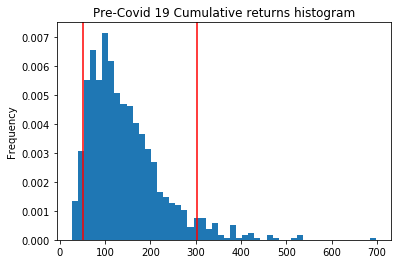

In [57]:
# Visualize the distribution of the ending returns
plt.figure();
ending_cumulative_returns.plot(kind="hist", title = "Pre-Covid 19 Cumulative returns histogram", density=True, bins=50)
plt.axvline(confidence_interval.iloc[0], color="r")
plt.axvline(confidence_interval.iloc[1], color="r")

In [58]:
# Compute cumulative returns
cumulative_returns_percentiles = ending_cumulative_returns.quantile(q=[0.1, 0.5, 0.90])
print(f"Expected cumulative returns at 20 years for 10th, 50th and 90th percentiles: \n{cumulative_returns_percentiles}")

Expected cumulative returns at 20 years for 10th, 50th and 90th percentiles: 
0.1     60.899008
0.5    128.279888
0.9    248.083183
Name: 5040, dtype: float64


In [59]:
# Set initial investment
initial_investment = 20000
# Compute expected portfolio return
cumulative_pnl = round(initial_investment* cumulative_returns_percentiles)
cumulative_pnl.astype(int)

0.1    1217980
0.5    2565598
0.9    4961664
Name: 5040, dtype: int32

In [60]:
############################# Monte Carlo for each market indices for last 1 year Post-Covid ##############
##########################################################################################################

# Set the random seed for results reproducibility (for testing purposes only)
np.random.seed(42)

# Setup the Monte Carlo Parameters
number_simulations = 1000
number_records = 252 * 20
# Initialize empty DataFrame to hold simulated prices for each simulation
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Save the last day's closing price - change it 
sp500_last_price_post_covid = post_covid_1_df['INX'][-1]

# Avg daily return Pre & Post Covid
avg_daily_return_sp500 = daily_returns_post_covid.mean()['INX']
# STD  for pre covid
std_dev_daily_return_postcovid_sp500 = daily_returns_post_covid.std()['INX']

# Run the simulation of projecting stock prices for the next trading year, 600` times
for n in range(number_simulations):

    # Initialize the simulated prices list with the last closing price of `SPY` and `AGG`
    simulated_sp500_prices = [sp500_last_price_post_covid]

    # Simulate the returns for 252 * 30 days
    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        simulated_sp500_price = simulated_sp500_prices[-1] * (1 + np.random.normal(avg_daily_return_sp500, std_dev_daily_return_postcovid_sp500))
        # Append the simulated price to the list
        simulated_sp500_prices.append(simulated_sp500_price)
    # Append the simulated prices of each simulation to DataFrame
    monte_carlo= pd.Series(simulated_sp500_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns_post_covid = monte_carlo.pct_change()
#     Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + simulated_daily_returns_post_covid.fillna(0)).cumprod()

portfolio_cumulative_returns.head()

0         1         2         3         4         5         6    \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  1.012000  1.012054  1.042739  0.977285  1.008576  0.993647  0.966769   
2  1.009533  0.973828  1.012472  0.981233  0.991481  0.970906  0.964388   
3  1.025112  0.970742  1.019487  0.995145  1.009007  0.968987  0.955604   
4  1.061334  0.953487  1.056526  1.010104  1.015806  0.957749  0.976839   

        7         8         9    ...       990       991       992       993  \
0  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1  1.039153  0.987806  0.992172  ...  0.987856  0.990958  0.999026  1.035755   
2  1.071428  0.980364  1.016907  ...  0.965340  0.970750  1.013651  1.078104   
3  1.023445  0.983275  1.018419  ...  0.946220  0.983109  0.998908  1.092267   
4  1.006253  0.988843  0.972871  ...  0.868965  0.989458  0.986771  1.117694   

        994       995       996       997       998       999  
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1  1.020424  1.003560  0.984879  0.985953  0.994024  1.005485  
2  1.061011  1.031690  0.945534  1.039130  0.996741  1.023121  
3  1.066084  1.093206  0.960028  1.042662  0.980925  1.041833  
4  1.019054  1.065768  0.963669  1.029448  0.963878  1.063316  

[5 rows x 1000 columns]

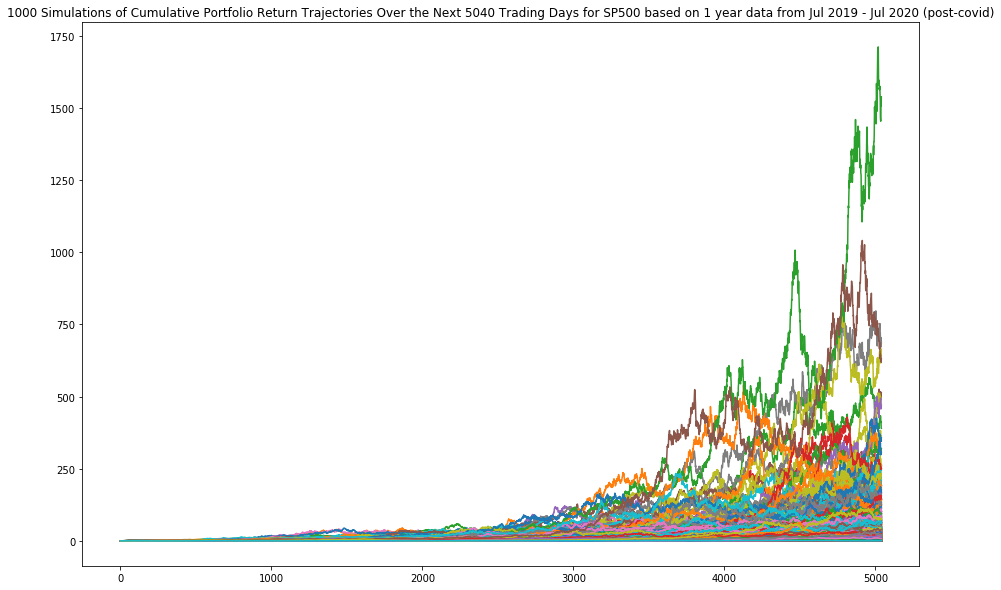

In [61]:
#POST-Covid simulated cumulative returns for S&P 500
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next {number_records} Trading Days for SP500 based on 1 year data from Jul 2019 - Jul 2020 (post-covid)"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize =(15,10))
plt.savefig("Images/sp500_simulation_post_covid_1yr.png")

In [62]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    20.535293
1     2.665657
2    26.682407
3    62.147785
4     1.014356
Name: 5040, dtype: float64

In [63]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05      0.716284
0.95    129.427337
Name: 5040, dtype: float64

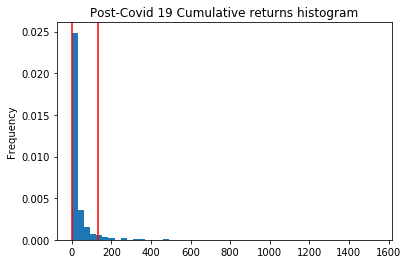

In [64]:
# Visualize the distribution of the ending returns
plt.figure();
ending_cumulative_returns.plot(kind="hist", title = "Post-Covid 19 Cumulative returns histogram", density=True, bins=50)
plt.axvline(confidence_interval.iloc[0], color="r")
plt.axvline(confidence_interval.iloc[1], color="r")
#plt.savefig(‘./Images/ending_returns_hist.png’)

In [65]:
# Compute cumulative returns
cumulative_returns_percentiles = ending_cumulative_returns.quantile(q=[0.1, 0.5, 0.90])
print(f"Expected cumulative returns at 20 years for 10th, 50th and 90th percentiles: \n{cumulative_returns_percentiles}")

Expected cumulative returns at 20 years for 10th, 50th and 90th percentiles: 
0.1     1.121199
0.5    10.097051
0.9    71.909377
Name: 5040, dtype: float64


In [66]:
# Set initial investment
initial_investment = 20000
# Compute expected portfolio return
cumulative_pnl = round(initial_investment* cumulative_returns_percentiles)
cumulative_pnl.astype(int)

0.1      22424
0.5     201941
0.9    1438188
Name: 5040, dtype: int32

In [67]:
############################# Monte Carlo for SHANGHAI Composite Market index for last 1 year Pre-Covid ##############
##########################################################################################################

# Set the random seed for results reproducibility (for testing purposes only)
np.random.seed(42)

# Setup the Monte Carlo Parameters
number_simulations = 1000
number_records = 252 * 20
# Initialize empty DataFrame to hold simulated prices for each simulation
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Save the last day's closing price - change it 
sha_last_price= pre_covid_1_df['SHA'][-1]
print(f"Last Day's Closing Price of SHA stock is: {sha_last_price}")

# Avg daily return Pre & Post Covid
avg_daily_return_sha = daily_returns_pre_covid.mean()['SHA']
# STD  for pre covid
std_dev_daily_return_precovid_sha = daily_returns_pre_covid.std()['SHA']


# Run the simulation of projecting stock prices for the next trading year, 600` times
for n in range(number_simulations):

    # Initialize the simulated prices list with the last closing price of `SPY` and `AGG`
    simulated_sha_prices = [sha_last_price]
    
    
    # Simulate the returns for 252 * 30 days
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_sha_price = simulated_sha_prices[-1] * (1 + np.random.normal(avg_daily_return_sha, 
                                                                               std_dev_daily_return_precovid_sha))
        # Append the simulated price to the list
        simulated_sha_prices.append(simulated_sha_price)
    # Append the simulated prices of each simulation to DataFrame
    monte_carlo= pd.Series(simulated_sha_prices)
    # Calculate the daily returns of simulated prices
    simulated_daily_returns_pre_covid = monte_carlo.pct_change()
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + simulated_daily_returns_pre_covid.fillna(0)).cumprod()
portfolio_cumulative_returns.head()

Last Day's Closing Price of SHA stock is: 2917.008056640625


0         1         2         3         4         5         6    \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  1.006267  1.006297  1.023466  0.986843  1.004351  0.995998  0.980959   
2  1.004445  0.984581  1.006387  0.988633  0.994377  0.982799  0.979169   
3  1.012669  0.982395  1.009838  0.996033  1.003767  0.981273  0.973741   
4  1.032237  0.972185  1.029915  1.003966  1.007103  0.974466  0.985413   

        7         8         9    ...       990       991       992       993  \
0  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1  1.021460  0.992730  0.995173  ...  0.992758  0.994494  0.999008  1.019558   
2  1.038754  0.988101  1.008610  ...  0.979654  0.982702  1.006744  1.042427   
3  1.012261  0.989301  1.008998  ...  0.968359  0.989263  0.998101  1.049623   
4  1.002294  0.991994  0.983297  ...  0.923689  0.992395  0.990870  1.062826   

        994       995       996       997       998       999  
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1  1.010980  1.001545  0.991093  0.991693  0.996209  1.002622  
2  1.033028  1.016805  0.968496  1.021177  0.997287  1.012013  
3  1.035329  1.050273  0.976370  1.022662  0.987987  1.021917  
4  1.009311  1.035054  0.978005  1.014954  0.977939  1.033250  

[5 rows x 1000 columns]

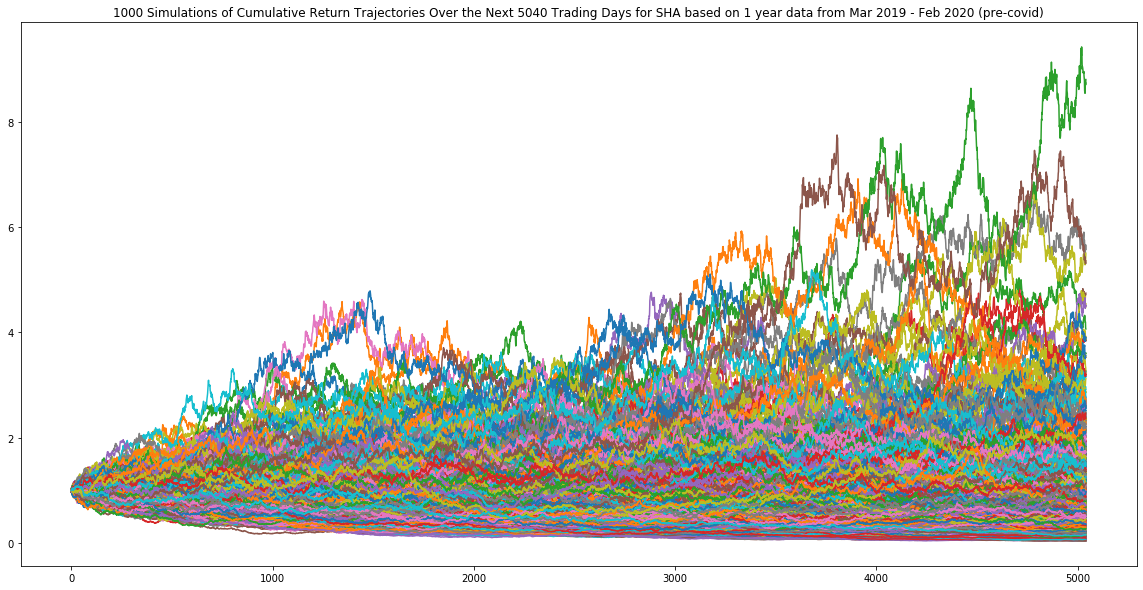

In [68]:
#Pre-Covid simulated cumulative returns for SHANGHAI COMPOSITE INDEX
plot_title = f"{n+1} Simulations of Cumulative Return Trajectories Over the Next {number_records} Trading Days for SHA based on 1 year data from Mar 2019 - Feb 2020 (pre-covid)"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize =(20,10))
plt.savefig("Images/sha_simulation_pre_covid_1yr.png")

In [69]:
# To determine forecasted stock price, convert cumulative returns back to price by multiplying it by last price of the stock
forecasted_price_sha = portfolio_cumulative_returns*sha_last_price
forecasted_price_sha.head()

0            1            2            3            4    \
0  2917.008057  2917.008057  2917.008057  2917.008057  2917.008057   
1  2935.288843  2935.377225  2985.458881  2878.629840  2929.701381   
2  2929.972840  2872.029631  2935.638758  2883.849711  2900.606266   
3  2953.962349  2865.654566  2945.706030  2905.437617  2927.997670   
4  3011.043199  2835.872866  3004.269654  2928.576425  2937.728375   

           5            6            7            8            9    ...  \
0  2917.008057  2917.008057  2917.008057  2917.008057  2917.008057  ...   
1  2905.334205  2861.466700  2979.607018  2895.800975  2902.927306  ...   
2  2866.832490  2856.244132  3030.053946  2882.299981  2942.122134  ...   
3  2862.380709  2840.411199  2952.773410  2885.799502  2943.255372  ...   
4  2842.525186  2874.457484  2923.700980  2893.653549  2868.286223  ...   

           990          991          992          993          994  \
0  2917.008057  2917.008057  2917.008057  2917.008057  2917.008057   
1  2895.882536  2900.945570  2914.114800  2974.060003  2949.037952   
2  2857.657930  2866.549034  2936.681009  3040.768934  3013.350530   
3  2824.711502  2885.688506  2911.469997  3061.759728  3020.063504   
4  2694.407254  2894.824819  2890.374953  3100.272101  2944.168943   

           995          996          997          998          999  
0  2917.008057  2917.008057  2917.008057  2917.008057  2917.008057  
1  2921.514769  2891.024905  2892.776685  2905.950329  2924.656425  
2  2966.028436  2825.111102  2978.781458  2909.094896  2952.050006  
3  3063.654245  2848.077807  2983.114528  2881.966657  2980.939917  
4  3019.261475  2852.848585  2960.627825  2852.654822  3013.999614  

[5 rows x 1000 columns]

In [71]:
# Calculate average price of all simulations for the time period
avg_forecasted_price_sha = forecasted_price_sha.mean(axis =1)
avg_forecasted_price_sha.count() 
avg_forecasted_price_sha.head()

0    2917.008057
1    2916.702880
2    2917.523119
3    2917.470363
4    2915.724050
dtype: float64

In [72]:
# Select first 95 records and convert to dataframe for comparison with actual prices
avg_price_sha_comparison = avg_forecasted_price_sha.iloc[0:95].to_frame()
avg_price_sha_comparison.columns = ["forecasted_price"]
avg_price_sha_comparison.head()
avg_price_sha_comparison.count()

forecasted_price    95
dtype: int64

In [73]:
SHA_actual_price= post_covid_1_df["SHA"].tail(95)
SHA_actual_price = SHA_actual_price.reset_index().copy()
SHA_actual_price.head()

Date          SHA
0 2020-02-13  2906.073975
1 2020-02-14  2917.008057
2 2020-02-18  2984.971924
3 2020-02-19  2975.402100
4 2020-02-20  3030.154053

In [74]:
# Compare forecasted prices with actual prices during covid
# SP500_actual_covid and forecasted_price
forecasted_price_shacomparison = pd.merge(SHA_actual_price, avg_price_sha_comparison, left_index=True, right_index=True)
forecasted_price_shacomparison = forecasted_price_shacomparison.set_index("Date").copy()
forecasted_price_shacomparison.head()

SHA  forecasted_price
Date                                     
2020-02-13  2906.073975       2917.008057
2020-02-14  2917.008057       2916.702880
2020-02-18  2984.971924       2917.523119
2020-02-19  2975.402100       2917.470363
2020-02-20  3030.154053       2915.724050

In [75]:
# Average SHANGHAI COMPOSITE closing prices for simulated versus actual
forecasted_price_shacomparison.mean()

SHA                 2949.576349
forecasted_price    2901.318030
dtype: float64

In [123]:
# forecasted_price_shacomparison.plot(figsize = (20,10), title = "SHA: Forecasted index price vs actual market index price over the covid period")
# plt.savefig("Images/SHA_forecast_price_vs_actual.png")
forecasted_price_shacomparison.hvplot.line(
    title = "SHA: Forecasted index price vs actual market index price over the covid period", 
    xlabel = "Date", 
    ylabel = "Returns",
    frame_height = 300, 
    frame_width=600, 
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [77]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    0.784621
1    0.251802
2    0.910012
3    1.467400
4    0.143774
Name: 5040, dtype: float64

In [79]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    0.120275
0.95    2.210315
Name: 5040, dtype: float64

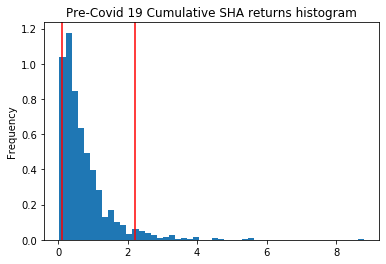

In [80]:
# Visualize the distribution of the ending returns
plt.figure();
ending_cumulative_returns.plot(kind="hist", title = "Pre-Covid 19 Cumulative SHA returns histogram", density=True, bins=50)
plt.axvline(confidence_interval.iloc[0], color="r")
plt.axvline(confidence_interval.iloc[1], color="r")
#plt.savefig(‘./Images/ending_returns_hist.png’)

In [81]:
# Set initial investment
initial_investment = 20000
# Compute expected portfolio return
cumulative_pnl = round(initial_investment* cumulative_returns_percentiles)
cumulative_pnl.astype(int)

0.1      22424
0.5     201941
0.9    1438188
Name: 5040, dtype: int32

In [82]:
############################# Monte Carlo for FTSE 100 Market index for last 1 year Pre-Covid ##############
##########################################################################################################

# Set the random seed for results reproducibility (for testing purposes only)
np.random.seed(42)

# Setup the Monte Carlo Parameters
number_simulations = 1000
number_records = 252 * 20
# Initialize empty DataFrame to hold simulated prices for each simulation
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Save the last day's closing price - change it 
ukx_last_price= pre_covid_1_df['UKX'][-1]
print(f"Last Day's Closing Price of FTSE 100 stock is: {ukx_last_price}")

# Avg daily return Pre & Post Covid
avg_daily_return_ukx = daily_returns_pre_covid.mean()['UKX']
# STD  for pre covid
std_dev_daily_return_precovid_ukx = daily_returns_pre_covid.std()['UKX']

# Run the simulation of projecting stock prices for the next trading year, 600` times
for n in range(number_simulations):
    # Initialize the simulated prices list with the last closing price of `SPY` and `AGG`
    simulated_ukx_prices = [ukx_last_price]
    # Simulate the returns for 252 * 30 days
    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        simulated_ukx_price = simulated_ukx_prices[-1] * (1 + np.random.normal(avg_daily_return_ukx, 
                                                                               std_dev_daily_return_precovid_ukx))
        # Append the simulated price to the list
        simulated_ukx_prices.append(simulated_ukx_price)
    # Append the simulated prices of each simulation to DataFrame
    monte_carlo= pd.Series(simulated_ukx_prices)
    # Calculate the daily returns of simulated prices
    simulated_daily_returns_pre_covid = monte_carlo.pct_change()
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + simulated_daily_returns_pre_covid.fillna(0)).cumprod()
portfolio_cumulative_returns.head()

Last Day's Closing Price of FTSE 100 stock is: 7409.13


0         1         2         3         4         5         6    \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  1.004304  1.004324  1.015347  0.991833  1.003074  0.997711  0.988055   
2  1.003418  0.990689  1.004753  0.993266  0.996960  0.989502  0.987175   
3  1.008975  0.989555  1.007247  0.998319  1.003284  0.988793  0.983938   
4  1.021776  0.983230  1.020387  1.003703  1.005706  0.984666  0.991787   

        7         8         9    ...       990       991       992       993  \
0  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1  1.014059  0.995613  0.997181  ...  0.995631  0.996745  0.999644  1.012838   
2  1.025367  0.992912  1.006105  ...  0.987472  0.989437  1.004894  1.027709   
3  1.008864  0.993964  1.006637  ...  0.980439  0.993956  0.999637  1.032552   
4  1.002769  0.995980  0.990456  ...  0.951676  0.996255  0.995267  1.041181   

        994       995       996       997       998       999  
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1  1.007331  1.001272  0.994561  0.994947  0.997847  1.001964  
2  1.021718  1.011349  0.980281  1.014219  0.998820  1.008271  
3  1.023466  1.033005  0.985673  1.015450  0.993120  1.014889  
4  1.007239  1.023684  0.987010  1.010821  0.986913  1.022400  

[5 rows x 1000 columns]

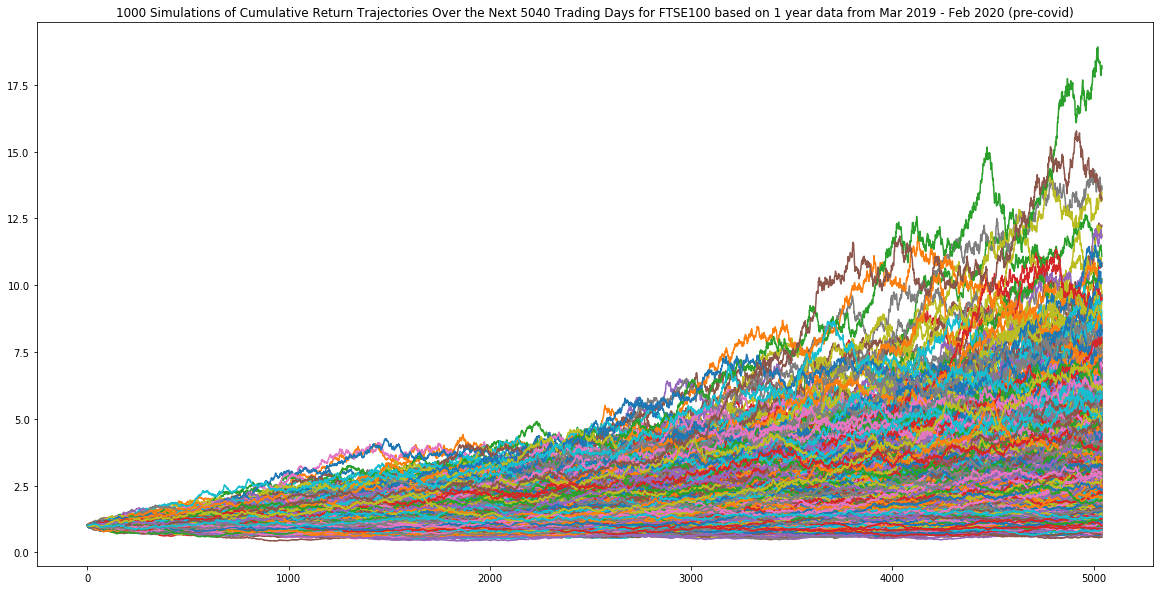

In [83]:
#Pre-Covid simulated cumulative returns for SHANGHAI COMPOSITE INDEX
plot_title = f"{n+1} Simulations of Cumulative Return Trajectories Over the Next {number_records} Trading Days for FTSE100 based on 1 year data from Mar 2019 - Feb 2020 (pre-covid)"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize =(20,10))
plt.savefig("Images/ftse_simulation_pre_covid_1yr.png")

In [84]:
# To determine forecasted stock price, convert cumulative returns back to price by multiplying it by last price of the stock
forecasted_price_ukx = portfolio_cumulative_returns*ukx_last_price
forecasted_price_ukx.head()

0            1            2            3            4    \
0  7409.130000  7409.130000  7409.130000  7409.130000  7409.130000   
1  7441.020890  7441.165024  7522.838733  7348.620772  7431.908796   
2  7434.455735  7340.147057  7444.346339  7359.237848  7386.605273   
3  7475.623599  7331.745061  7462.825765  7396.673027  7433.463561   
4  7570.469141  7284.879421  7560.180370  7436.569513  7451.410072   

           5            6            7            8            9    ...  \
0  7409.130000  7409.130000  7409.130000  7409.130000  7409.130000  ...   
1  7392.170540  7320.630937  7513.295451  7376.623645  7388.245343  ...   
2  7331.347162  7314.105867  7597.076377  7356.611407  7454.366217  ...   
3  7326.094202  7290.125968  7474.801787  7364.409899  7458.300799  ...   
4  7295.520543  7348.275452  7429.646082  7379.344575  7338.418619  ...   

           990          991          992          993          994  \
0  7409.130000  7409.130000  7409.130000  7409.130000  7409.130000   
1  7376.756655  7385.013506  7406.490031  7504.249319  7463.443086   
2  7316.308467  7330.863884  7445.392305  7614.426967  7570.039716   
3  7264.202628  7364.347084  7406.442020  7650.311613  7582.990969   
4  7051.087838  7381.383181  7374.064690  7714.242548  7462.766674   

           995          996          997          998          999  
0  7409.130000  7409.130000  7409.130000  7409.130000  7409.130000  
1  7418.557981  7368.834778  7371.691601  7393.175323  7423.681427  
2  7493.212631  7263.032683  7514.477211  7400.385854  7470.408325  
3  7653.669464  7302.980205  7523.603414  7358.152772  7519.443657  
4  7584.610510  7312.883186  7489.300969  7312.166472  7575.096315  

[5 rows x 1000 columns]

In [87]:
# Calculate average price of all simulations for the time period
avg_forecasted_price_ukx = forecasted_price_ukx.mean(axis =1)
avg_forecasted_price_ukx.count() 
avg_forecasted_price_ukx.head()

0    7409.130000
1    7410.710699
2    7414.127252
3    7416.123245
4    7415.347499
dtype: float64

In [88]:
# Select first 95 records and convert to dataframe for comparison with actual prices
avg_price_ukx_comparison = avg_forecasted_price_ukx.iloc[0:95].to_frame()
avg_price_ukx_comparison.columns = ["forecasted_price"]
avg_price_ukx_comparison.head()
avg_price_ukx_comparison.count()

forecasted_price    95
dtype: int64

In [89]:
UKX_actual_price= post_covid_1_df["UKX"].tail(95)
UKX_actual_price = UKX_actual_price.reset_index().copy()
UKX_actual_price.head()

Date      UKX
0 2020-02-13  7452.03
1 2020-02-14  7409.13
2 2020-02-18  7382.01
3 2020-02-19  7457.02
4 2020-02-20  7436.64

In [90]:
# Compare forecasted prices with actual prices during covid
# UKX_actual_covid and forecasted_price
forecasted_price_ukxcomparison = pd.merge(UKX_actual_price, avg_price_ukx_comparison, left_index=True, right_index=True)
forecasted_price_ukxcomparison = forecasted_price_ukxcomparison.set_index("Date").copy()
forecasted_price_ukxcomparison.head()

UKX  forecasted_price
Date                                 
2020-02-13  7452.03       7409.130000
2020-02-14  7409.13       7410.710699
2020-02-18  7382.01       7414.127252
2020-02-19  7457.02       7416.123245
2020-02-20  7436.64       7415.347499

In [91]:
# Average FTSE 100 closing prices for simulated versus actual
forecasted_price_ukxcomparison.mean()

UKX                 6102.509579
forecasted_price    7481.801235
dtype: float64

In [122]:
# forecasted_price_ukxcomparison.plot(figsize = (20,10), title = "FTSE 100: Forecasted price vs actual market index price over the covid period")
# plt.savefig("Images/FTSE_forecast_price_vs_actual.png")
forecasted_price_ukxcomparison.hvplot.line(
    title = "FTSE 100: Forecasted price vs actual market index price over the covid period", 
    xlabel = "Date", 
    ylabel = "Returns",
    frame_height = 300, 
    frame_width=600, 
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [94]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    3.862234
1    1.865722
2    4.249867
3    5.782634
4    1.294654
Name: 5040, dtype: float64

In [95]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    1.157770
0.95    7.518144
Name: 5040, dtype: float64

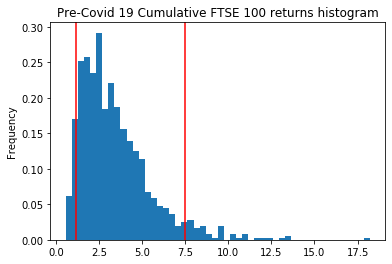

In [96]:
# Visualize the distribution of the ending returns
plt.figure();
ending_cumulative_returns.plot(kind="hist", title = "Pre-Covid 19 Cumulative FTSE 100 returns histogram", density=True, bins=50)
plt.axvline(confidence_interval.iloc[0], color="r")
plt.axvline(confidence_interval.iloc[1], color="r")

In [97]:
# Set initial investment
initial_investment = 20000
# Compute expected portfolio return
cumulative_pnl = round(initial_investment* cumulative_returns_percentiles)
cumulative_pnl.astype(int)

0.1      22424
0.5     201941
0.9    1438188
Name: 5040, dtype: int32

In [ ]:
######################################################################################################

In [99]:
# Drop nulls from Pre Covid Dataframe
pre_covid_5_df.dropna(inplace=True)
pre_covid_5_df.isnull().sum()
# # Drop nulls from Post Covid Dataframe
post_covid_5_df.dropna(inplace=True)
post_covid_5_df.isnull().sum()

INX      0
TSX      0
NI225    0
SHA      0
SX5E     0
UKX      0
dtype: int64

In [100]:
# Calculate Daily Returns for Pre Covid Data
daily_returns_pre_covid = pre_covid_5_df.pct_change().dropna().copy()
daily_returns_pre_covid.head()

INX       TSX     NI225       SHA      SX5E       UKX
Date                                                                  
2015-03-03 -0.004539 -0.008530 -0.000623 -0.021950 -0.011690 -0.007422
2015-03-04 -0.004389 -0.003377 -0.005929  0.005051  0.009673  0.004371
2015-03-05  0.001196  0.001346  0.002579 -0.009470  0.009703  0.006056
2015-03-06 -0.014174 -0.009971  0.011687 -0.002244 -0.000163 -0.007088
2015-03-09  0.003944 -0.006554 -0.009512  0.018888 -0.002029 -0.005112

In [101]:
######################################################################################################
############################# Monte Carlo for each market indices for last 5 year Pre-Covid ##############
##########################################################################################################

# Set the random seed for results reproducibility (for testing purposes only)
np.random.seed(42)

# Setup the Monte Carlo Parameters
number_simulations = 1000
number_records = 252 * 20
# Initialize empty DataFrame to hold simulated prices for each simulation
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Save the last day's closing price - change it 
sp500_last_price= pre_covid_5_df['INX'][-1]
print(f"Last Day's Closing Price of S&P 500 stock is: {sp500_last_price }")

# Avg daily return Pre & Post Covid
avg_daily_return_sp500 = daily_returns_pre_covid.mean()['INX']
# STD  for pre covid
std_dev_daily_return_precovid_sp500 = daily_returns_pre_covid.std()['INX']


# Run the simulation of projecting stock prices for the next trading year, 600` times
for n in range(number_simulations):

    # Initialize the simulated prices list with the last closing price of `SPY` and `AGG`
    simulated_sp500_prices = [sp500_last_price]
    # Simulate the returns for 252 * 30 days
    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        simulated_sp500_price = simulated_sp500_prices[-1] * (1 + np.random.normal(avg_daily_return_sp500, 
                                                                                   std_dev_daily_return_precovid_sp500))
        # Append the simulated price to the list
        simulated_sp500_prices.append(simulated_sp500_price)
    # Append the simulated prices of each simulation to DataFrame
    monte_carlo= pd.Series(simulated_sp500_prices)
    # Calculate the daily returns of simulated prices
    simulated_daily_returns_pre_covid = monte_carlo.pct_change()
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + simulated_daily_returns_pre_covid.fillna(0)).cumprod()

portfolio_cumulative_returns.head()

Last Day's Closing Price of S&P 500 stock is: 3380.159912109375


0         1         2         3         4         5         6    \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  1.004930  1.004952  1.017006  0.991293  1.003586  0.997720  0.987162   
2  1.004186  0.990258  1.005630  0.993081  0.997120  0.988966  0.986420   
3  1.010491  0.989239  1.008584  0.998827  1.004260  0.988413  0.983104   
4  1.024736  0.982546  1.023198  1.004942  1.007136  0.984123  0.991899   

        7         8         9    ...       990       991       992       993  \
0  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1  1.015598  0.995426  0.997141  ...  0.995446  0.996664  0.999834  1.014263   
2  1.028209  0.992695  1.007123  ...  0.986748  0.988896  1.005800  1.030774   
3  1.010342  0.994068  1.007929  ...  0.979284  0.994056  1.000271  1.036316   
4  1.003893  0.996495  0.990438  ...  0.948086  0.996793  0.995713  1.046018   

        994       995       996       997       998       999  
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1  1.008240  1.001615  0.994276  0.994698  0.997869  1.002371  
2  1.024212  1.012861  0.978887  1.015989  0.999156  1.009495  
3  1.026357  1.036805  0.984994  1.017566  0.993144  1.016966  
4  1.008793  1.026807  0.986675  1.012720  0.986579  1.025425  

[5 rows x 1000 columns]

In [103]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    13.288926
1     5.996191
2    14.752391
3    20.653027
4     4.025643
Name: 5040, dtype: float64

In [104]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05     3.561916
0.95    27.523967
Name: 5040, dtype: float64

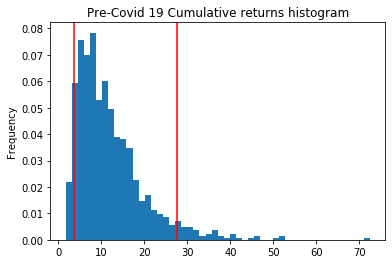

In [105]:
# Visualize the distribution of the ending returns
plt.figure();
ending_cumulative_returns.plot(kind="hist", title = "Pre-Covid 19 Cumulative returns histogram", density=True, bins=50)
plt.axvline(confidence_interval.iloc[0], color="r")
plt.axvline(confidence_interval.iloc[1], color="r")
#plt.savefig(‘./Images/ending_returns_hist.png’)

In [106]:
# Compute cumulative returns
cumulative_returns_percentiles = ending_cumulative_returns.quantile(q=[0.1, 0.5, 0.90])
print(f"Expected cumulative returns at 20 years for 10th, 50th and 90th percentiles: \n{cumulative_returns_percentiles}")

Expected cumulative returns at 20 years for 10th, 50th and 90th percentiles: 
0.1     4.241142
0.5    10.092322
0.9    21.737965
Name: 5040, dtype: float64


In [107]:
# Set initial investment
initial_investment = 20000
# Compute expected portfolio return
cumulative_pnl = round(initial_investment* cumulative_returns_percentiles)
cumulative_pnl.astype(int)

0.1     84823
0.5    201846
0.9    434759
Name: 5040, dtype: int32

In [108]:
# Calculate Daily Returns for Pre Covid Data
daily_returns_post_covid = post_covid_5_df.pct_change().dropna().copy()
daily_returns_post_covid.head()

INX       TSX     NI225       SHA      SX5E       UKX
Date                                                                  
2015-07-06 -0.003862 -0.003033 -0.019997 -0.034977 -0.028312 -0.014296
2015-07-07  0.006081  0.002117  0.013150 -0.012921 -0.021101 -0.015832
2015-07-08 -0.016653 -0.014524 -0.031357 -0.059009  0.010112  0.009093
2015-07-09  0.002262 -0.009270  0.005971  0.057635  0.027808  0.014009
2015-07-10  0.012338  0.009287 -0.003811  0.045419  0.031807  0.013940

In [112]:
############################# Monte Carlo for each market indices for last 5 year Post-Covid ##############
##########################################################################################################

# Set the random seed for results reproducibility (for testing purposes only)
np.random.seed(42)

# Setup the Monte Carlo Parameters
number_simulations = 1000
number_records = 252 * 20
# Initialize empty DataFrame to hold simulated prices for each simulation
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Save the last day's closing price - change it 
sp500_last_price_post_covid = post_covid_5_df['INX'][-1]

# Avg daily return Post Covid
avg_daily_return_sp500 = daily_returns_post_covid.mean()['INX']
# STD  for pre covid
std_dev_daily_return_postcovid_sp500 = daily_returns_post_covid.std()['INX']


# Run the simulation of projecting stock prices for the next trading year, 600` times
for n in range(number_simulations):

    # Initialize the simulated prices list with the last closing price of `SPY` and `AGG`
    simulated_sp500_prices = [sp500_last_price_post_covid]

    # Simulate the returns for 252 * 30 days
    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        simulated_sp500_price = simulated_sp500_prices[-1] * (1 + np.random.normal(avg_daily_return_sp500, 
                                                                                   std_dev_daily_return_postcovid_sp500))
        # Append the simulated price to the list
        simulated_sp500_prices.append(simulated_sp500_price)
    # Append the simulated prices of each simulation to DataFrame
    monte_carlo= pd.Series(simulated_sp500_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns_post_covid = monte_carlo.pct_change()
#     Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + simulated_daily_returns_post_covid.fillna(0)).cumprod()

portfolio_cumulative_returns.head()

0         1         2         3         4         5         6    \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  1.007083  1.007114  1.024937  0.986919  1.005094  0.996423  0.980811   
2  1.005771  0.985133  1.007773  0.989346  0.995312  0.983290  0.979518   
3  1.014900  0.983431  1.011942  0.997605  1.005644  0.982272  0.974447   
4  1.035844  0.973389  1.033412  1.006429  1.009694  0.975765  0.987135   

        7         8         9    ...       990       991       992       993  \
0  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1  1.022855  0.993030  0.995566  ...  0.993059  0.994861  0.999547  1.020881   
2  1.041423  0.988797  1.010095  ...  0.980024  0.983189  1.008159  1.045241   
3  1.014450  0.990613  1.011081  ...  0.968860  0.990571  0.999756  1.053335   
4  1.004667  0.993984  0.984930  ...  0.923022  0.994399  0.992813  1.067697   

        994       995       996       997       998       999  
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1  1.011976  1.002181  0.991330  0.991954  0.996642  1.003299  
2  1.035470  1.018611  0.968439  1.023141  0.998336  1.013633  
3  1.038462  1.054004  0.977171  1.025277  0.989248  1.024516  
4  1.011970  1.038757  0.979434  1.017845  0.979374  1.036903  

[5 rows x 1000 columns]

In [114]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    14.011613
1     4.307523
2    16.340133
3    26.819252
4     2.410674
Name: 5040, dtype: float64

In [116]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05     2.001862
0.95    41.024971
Name: 5040, dtype: float64

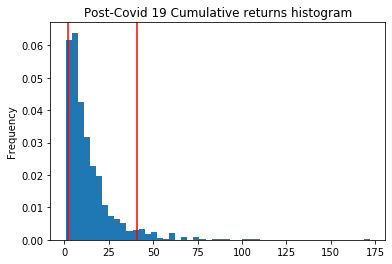

In [117]:
# Visualize the distribution of the ending returns
plt.figure();
ending_cumulative_returns.plot(kind="hist", title = "Post-Covid 19 Cumulative returns histogram", density=True, bins=50)
plt.axvline(confidence_interval.iloc[0], color="r")
plt.axvline(confidence_interval.iloc[1], color="r")

In [118]:
# Compute cumulative returns
cumulative_returns_percentiles = ending_cumulative_returns.quantile(q=[0.1, 0.5, 0.90])
print(f"Expected cumulative returns at 20 years for 10th, 50th and 90th percentiles: \n{cumulative_returns_percentiles}")

Expected cumulative returns at 20 years for 10th, 50th and 90th percentiles: 
0.1     2.591048
0.5     9.304089
0.9    28.949831
Name: 5040, dtype: float64


In [119]:
# Set initial investment
initial_investment = 20000
# Compute expected portfolio return
cumulative_pnl = round(initial_investment* cumulative_returns_percentiles)
cumulative_pnl.astype(int)

0.1     51821
0.5    186082
0.9    578997
Name: 5040, dtype: int32